In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [2]:
df =pd.read_csv('C:/Users/etiem/Downloads/Recipe Reviews and User Feedback Dataset.csv')

In [3]:
df

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,I just made this too. It is wonderful. As fo...


In [4]:
df.describe()

,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,18182.000000,18182.000000,18182.000000,18182.000000,1.818200e+04,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,121.465295,38.689363,21773.667253,2.159608,1.623710e+09,0.014630,1.089264,0.549335,4.288802,153.162138
std,116.747893,29.786647,23965.109637,10.014666,5.468697e+06,0.137974,4.201004,3.470124,1.544786,141.075316
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,150.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,520.000000,1.665756e+09,3.000000,106.000000,126.000000,5.000000,946.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB


In [6]:
#Dropping variables
df.isnull().sum()
df.dropna()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,I just made this too. It is wonderful. As fo...


In [7]:
# Check duplicates based on multiple columns
duplicate_comments = df[df.duplicated(subset=['text', 'recipe_name', 'user_name'], keep=False)]
print(duplicate_comments[['text', 'recipe_name', 'stars', 'user_name']])

                                                    text  \
102    I have made this Chil several times.  I cook f...   
180    This is a great recipe, I did only put half th...   
181    This is a great recipe, I did only put half th...   
445    This is such good Chili.  I love it and so doe...   
446    This is such good Chili.  I love it and so doe...   
...                                                  ...   
16426            This recipe is very good - when MADE :)   
17165  i cant take these to any event without someone...   
17166  i cant take these to any event without someone...   
17547  I sometimes substitute cooked salad shrimp for...   
17548  I sometimes substitute cooked salad shrimp for...   

                   recipe_name  stars      user_name  
102         Creamy White Chili      5   bingoqueen63  
180         Creamy White Chili      5  cindihartline  
181         Creamy White Chili      5  cindihartline  
445         Creamy White Chili      5   Grandmanonna  
446 

In [8]:
# duplicates should only be removed when they belong to the same recipe and user
df = df.drop_duplicates(subset=['text', 'recipe_name', 'user_name'], keep='first').reset_index(drop=True)

In [9]:
#Fixing the column name
df.rename(columns={'Unnamed: 0': 'num_records'}, inplace=True)

In [10]:
#Change "created at" variable to univerex to UTC

df['created_at_utc'] = pd.to_datetime(df['created_at'], unit='s', utc=True)

In [11]:
df.head(5)

,num_records,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,created_at_utc
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ...",2022-10-13 00:11:29+00:00
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...,2022-10-09 01:08:07+00:00
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...,2022-09-28 22:35:57+00:00
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee...",2022-08-29 15:43:28+00:00
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,2022-10-04 20:03:43+00:00


In [12]:
df['created_at_utc'].describe()

count                                  17880
mean     2021-06-15 03:20:54.446252800+00:00
min                2021-02-11 09:22:16+00:00
25%                2021-06-03 10:47:15+00:00
50%                2021-06-03 10:55:02+00:00
75%                2021-06-03 11:02:45+00:00
max                2022-10-14 14:00:35+00:00
Name: created_at_utc, dtype: object

In [13]:
# Group by recipe_number and compute summary statistics
summary_stats = df.groupby('recipe_number').agg(
    total_comments=('comment_id', 'count'),       # Count of comments
    avg_user_reputation=('user_reputation', 'mean'),  # Average user reputation
    avg_reply_count=('reply_count', 'mean'),     # Average reply count
    avg_thumbs_up=('thumbs_up', 'mean'),         # Average thumbs up
    avg_thumbs_down=('thumbs_down', 'mean'),     # Average thumbs down
    avg_star_rating=('stars', 'mean'),           # Average star rating
    avg_best_score=('best_score', 'mean')        # Average best score
).reset_index()

# Display the results
summary_stats.head(10)

,recipe_number,total_comments,avg_user_reputation,avg_reply_count,avg_thumbs_up,avg_thumbs_down,avg_star_rating,avg_best_score
0,1,580,1.465517,0.017241,0.572414,0.250000,4.501724,134.650000
1,2,506,2.136364,0.009881,0.322134,0.130435,4.584980,126.377470
2,3,668,1.679641,0.023952,1.098802,0.730539,4.559880,139.465569
3,4,336,3.023810,0.008929,2.883929,0.976190,4.526786,192.044643
4,5,197,1.477157,0.000000,0.131980,0.065990,4.461929,111.751269
5,6,390,1.384615,0.015385,0.933333,0.382051,4.507692,154.500000
6,7,368,1.877717,0.010870,0.785326,0.456522,4.608696,160.855978
7,8,241,1.070539,0.008299,1.286307,1.087137,4.082988,157.103734
8,9,331,1.416918,0.006042,0.625378,0.238671,4.114804,129.833837
9,10,332,2.259036,0.006024,0.638554,0.361446,4.632530,162.746988


In [14]:
# Add a ratio column for thumbs up to thumbs down
summary_stats['thumbs_up_to_down_ratio'] = summary_stats['avg_thumbs_up'] / summary_stats['avg_thumbs_down']

# Handle cases where thumbs down is 0 to avoid division by zero
summary_stats['thumbs_up_to_down_ratio'] = summary_stats['thumbs_up_to_down_ratio'].replace([float('inf'), -float('inf')], None).fillna(0)

# Display the updated summary table
summary_stats.head(10)

,recipe_number,total_comments,avg_user_reputation,avg_reply_count,avg_thumbs_up,avg_thumbs_down,avg_star_rating,avg_best_score,thumbs_up_to_down_ratio
0,1,580,1.465517,0.017241,0.572414,0.250000,4.501724,134.650000,2.289655
1,2,506,2.136364,0.009881,0.322134,0.130435,4.584980,126.377470,2.469697
2,3,668,1.679641,0.023952,1.098802,0.730539,4.559880,139.465569,1.504098
3,4,336,3.023810,0.008929,2.883929,0.976190,4.526786,192.044643,2.954268
4,5,197,1.477157,0.000000,0.131980,0.065990,4.461929,111.751269,2.000000
5,6,390,1.384615,0.015385,0.933333,0.382051,4.507692,154.500000,2.442953
6,7,368,1.877717,0.010870,0.785326,0.456522,4.608696,160.855978,1.720238
7,8,241,1.070539,0.008299,1.286307,1.087137,4.082988,157.103734,1.183206
8,9,331,1.416918,0.006042,0.625378,0.238671,4.114804,129.833837,2.620253
9,10,332,2.259036,0.006024,0.638554,0.361446,4.632530,162.746988,1.766667


In [15]:
summary_stats.tail(10)

,recipe_number,total_comments,avg_user_reputation,avg_reply_count,avg_thumbs_up,avg_thumbs_down,avg_star_rating,avg_best_score,thumbs_up_to_down_ratio
90,91,85,1.329412,0.000000,0.129412,0.023529,3.341176,110.270588,5.500000
91,92,114,4.500000,0.008772,3.114035,1.692982,4.570175,219.684211,1.839378
92,93,110,2.590909,0.000000,0.718182,0.536364,4.327273,149.927273,1.338983
93,94,96,3.197917,0.020833,1.583333,1.197917,4.395833,169.958333,1.321739
94,95,95,3.073684,0.010526,0.821053,0.894737,4.284211,140.326316,0.917647
95,96,109,2.211009,0.000000,0.348624,0.256881,4.440367,143.623853,1.357143
96,97,86,2.430233,0.000000,0.372093,0.220930,3.976744,132.000000,1.684211
97,98,128,6.539062,0.007812,2.992188,1.562500,4.390625,224.265625,1.915000
98,99,112,4.017857,0.000000,1.258929,0.535714,4.258929,188.821429,2.350000
99,100,119,3.336134,0.033613,1.554622,0.789916,4.369748,208.865546,1.968085


In [16]:
df['best_score'].value_counts(ascending=False)

best_score
100    13704
193     1447
253      374
142      201
297      171
       ...  
227        1
905        1
499        1
719        1
889        1
Name: count, Length: 588, dtype: int64

In [17]:
df['recipe_number'].value_counts()

recipe_number
3     668
1     580
2     506
13    397
6     390
     ... 
95     95
72     88
97     86
91     85
61     31
Name: count, Length: 100, dtype: int64

In [18]:
df['stars'].value_counts()

stars
5    13616
0     1647
4     1627
3      481
1      279
2      230
Name: count, dtype: int64

In [19]:
#How many users are there

df['user_name'].value_counts()

user_name
2124arizona        28
JGa2595176         27
No_Time_To_Cook    25
mjlouk             25
justmbeth          23
                   ..
billt1620           1
jjheath             1
Poeschl             1
jsoc                1
cafritz             1
Name: count, Length: 13586, dtype: int64

Dataframe is already based top receipe (With recipe number = 1)

In [54]:
# 1. Number of 5-star reviews per recipe
five_star_reviews = df[df['stars'] == 5].groupby('recipe_name')['stars'].count().sort_values(ascending=False)
print("Number of 5-star reviews per recipe:")
print(five_star_reviews)

Number of 5-star reviews per recipe:
recipe_name
Cheeseburger Soup               534
Creamy White Chili              483
Best Ever Banana Bread          435
Flavorful Chicken Fajitas       326
Favorite Chicken Potpie         321
                               ... 
Cheeseburger Paradise Soup       68
Twice-Baked Potato Casserole     63
Lime Chicken Tacos               56
Caramel Heavenlies               53
Vegetarian Linguine              26
Name: stars, Length: 100, dtype: int64


In [55]:
# 2. Ratio of thumbs up to thumbs down for each recipe
df['thumbs_ratio'] = df['thumbs_up'] / (df['thumbs_down'] + 1e-6)  # Avoid division by zero
thumbs_ratio = df.groupby('recipe_name')['thumbs_ratio'].mean().sort_values(ascending=False)
print("\nRatio of thumbs up to thumbs down per recipe:")
print(thumbs_ratio)


Ratio of thumbs up to thumbs down per recipe:
recipe_name
Skillet Shepherd’s Pie           911765.877199
Vegetarian Linguine              838710.241935
Tennessee Peach Pudding          824000.714000
Mamaw Emily’s Strawberry Cake    815126.463595
Creamy Grape Salad               808989.000826
                                     ...      
Peanut Butter Cup Cheesecake      62500.026042
Li’l Cheddar Meat Loaves          60747.689252
Pineapple Orange Cake             59459.615058
Caramel-Pecan Cheesecake Pie      34285.822381
Chocolate Caramel Candy           28037.392523
Name: thumbs_ratio, Length: 100, dtype: float64


In [56]:
# 3. Average rating per recipe
average_rating = df.groupby('recipe_name')['stars'].mean().sort_values(ascending=False)
print("\nAverage rating per recipe:")
print(average_rating)


Average rating per recipe:
recipe_name
Rustic Italian Tortellini Soup    4.731343
Corn Pudding                      4.711409
Pumpkin Bread                     4.645349
Macaroni Coleslaw                 4.636842
Zucchini Pizza Casserole          4.632530
                                    ...   
Peanut Butter Cup Cheesecake      3.802083
Twice-Baked Potato Casserole      3.776786
Caramel Heavenlies                3.341176
Fluffy Key Lime Pie               2.942478
Pineapple Orange Cake             2.616216
Name: stars, Length: 100, dtype: float64


In [57]:
# 4. Total number of reviews per recipe
total_reviews = df.groupby('recipe_name')['stars'].count().sort_values(ascending=False)
print("\nTotal number of reviews per recipe:")
print(total_reviews)


Total number of reviews per recipe:
recipe_name
Cheeseburger Soup          668
Creamy White Chili         580
Best Ever Banana Bread     506
Basic Homemade Bread       397
Favorite Chicken Potpie    390
                          ... 
Bacon Macaroni Salad        95
Blueberry French Toast      88
Lime Chicken Tacos          86
Caramel Heavenlies          85
Vegetarian Linguine         31
Name: stars, Length: 100, dtype: int64


In [58]:
# 5. Recipes with the most user engagement (sum of thumbs up and thumbs down)
df['total_thumbs'] = df['thumbs_up'] + df['thumbs_down']
most_engaged_recipes = df.groupby('recipe_name')['total_thumbs'].sum().sort_values(ascending=False)
print("\nRecipes with the most user engagement:")
print(most_engaged_recipes)


Recipes with the most user engagement:
recipe_name
Amish Breakfast Casserole                   1297
Cheeseburger Soup                           1222
Best Ever Potato Soup                        976
Traditional Lasagna                          941
Contest-Winning New England Clam Chowder     893
                                            ... 
Favorite Dutch Apple Pie                      23
Special Banana Nut Bread                      22
Chocolate Caramel Candy                       20
Peanut Butter Cup Cheesecake                  13
Caramel Heavenlies                            13
Name: total_thumbs, Length: 100, dtype: int64


In [59]:
# 6. Distribution of review ratings (1-5 stars)
rating_distribution = df['stars'].value_counts().sort_index()
print("\nDistribution of review ratings:")
print(rating_distribution)


Distribution of review ratings:
stars
0     1647
1      279
2      230
3      481
4     1627
5    13616
Name: count, dtype: int64


In [60]:
# 7. Recipes with the highest average thumbs up
highest_thumbs_up = df.groupby('recipe_name')['thumbs_up'].mean().sort_values(ascending=False)
print("\nRecipes with the highest average thumbs up:")
print(highest_thumbs_up)


Recipes with the highest average thumbs up:
recipe_name
Contest-Winning New England Clam Chowder    4.147651
Chicken Penne Casserole                     3.888889
Best Ever Potato Soup                       3.863354
First-Place Coconut Macaroons               3.331034
Ham and Swiss Sliders                       3.114035
                                              ...   
Caramel Heavenlies                          0.129412
Peanut Butter Cup Cheesecake                0.114583
Favorite Dutch Apple Pie                    0.104167
Li’l Cheddar Meat Loaves                    0.088785
Chocolate Caramel Candy                     0.046729
Name: thumbs_up, Length: 100, dtype: float64


In [61]:
# 8. Recipes with the highest thumbs down count
highest_thumbs_down = df.groupby('recipe_name')['thumbs_down'].mean().sort_values(ascending=False)
print("\nRecipes with the highest thumbs down count:")
print(highest_thumbs_down)


Recipes with the highest thumbs down count:
recipe_name
Best Ever Potato Soup                       2.198758
Simple Taco Soup                            2.176000
First-Place Coconut Macaroons               2.075862
Simple Au Gratin Potatoes                   1.908537
Contest-Winning New England Clam Chowder    1.845638
                                              ...   
Zucchini Cupcake                            0.026119
Caramel Heavenlies                          0.023529
Bruschetta Chicken                          0.023438
Special Banana Nut Bread                    0.022727
Peanut Butter Cup Cheesecake                0.020833
Name: thumbs_down, Length: 100, dtype: float64


In [62]:
# 9. Recipes with the most "attractive" reviews (5 stars and high thumbs up)
attractive_reviews = df[(df['stars'] == 5) & (df['thumbs_up'] > 10)]
attractive_recipes = attractive_reviews.groupby('recipe_name').size().sort_values(ascending=False)
print("\nRecipes with the most attractive reviews (5 stars and high thumbs up):")
print(attractive_recipes)


Recipes with the most attractive reviews (5 stars and high thumbs up):
recipe_name
Amish Breakfast Casserole             25
Cheeseburger Soup                     18
Best Ever Potato Soup                 18
Chicken Penne Casserole               13
Basic Homemade Bread                  12
                                      ..
Chicken Wild Rice Soup                 1
Seafood Lasagna                        1
Pork Chops with Scalloped Potatoes     1
Fluffy Pancakes                        1
Gluten-Free Banana Bread               1
Length: 69, dtype: int64


In [63]:
# 10. Analyze user reputation impact on thumbs up and thumbs down
user_reputation_impact = df.groupby('user_reputation')[['thumbs_up', 'thumbs_down']].mean()
print("\nImpact of user reputation on thumbs up and thumbs down:")
print(user_reputation_impact)


Impact of user reputation on thumbs up and thumbs down:
                 thumbs_up  thumbs_down
user_reputation                        
0                 5.646667     2.900000
1                 0.996214     0.512740
10                1.903522     0.940276
20                1.753521     0.478873
30                1.594595     1.094595
40                4.066667     0.600000
50                6.833333     2.388889
60               13.166667     3.833333
70                2.666667     1.000000
80                8.777778     0.777778
90               10.714286     4.857143
100               1.800000     6.400000
110               9.333333     6.333333
130               8.000000     8.000000
140               4.500000     0.000000
150               0.000000     0.000000
160               9.000000     0.000000
170               0.000000     0.000000
220               3.000000     0.000000
300               3.000000     2.000000
510               1.666667     0.000000
520               9.000

In [64]:
# 11. Recipes with the highest best_score
highest_best_score = df.groupby('recipe_name')['best_score'].mean().sort_values(ascending=False)
print("\nRecipes with the highest average best_score:")
print(highest_best_score)


Recipes with the highest average best_score:
recipe_name
Chicken Penne Casserole                              254.230159
Contest-Winning New England Clam Chowder             235.067114
Best Ever Potato Soup                                224.583851
Quick Cream of Mushroom Soup                         224.265625
Ham and Swiss Sliders                                219.684211
                                                        ...    
Caramel-Pecan Cheesecake Pie                         113.542857
Pumpkin Spice Cupcakes with Cream Cheese Frosting    111.751269
Caramel Heavenlies                                   110.270588
Peanut Butter Cup Cheesecake                         106.635417
Chocolate Caramel Candy                              105.514019
Name: best_score, Length: 100, dtype: float64


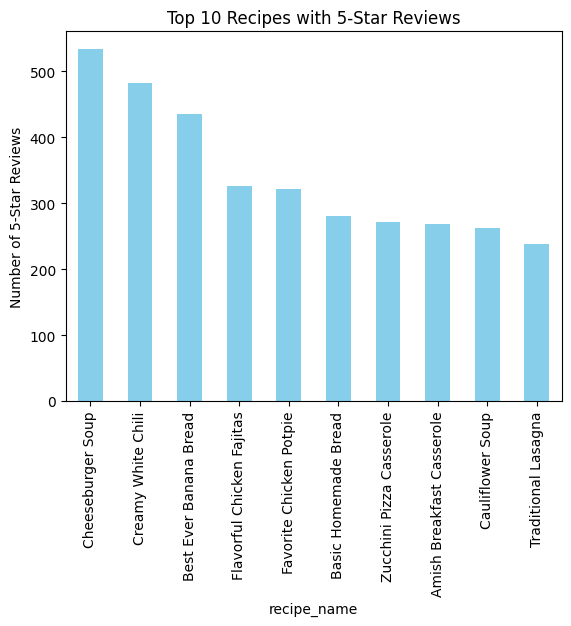

In [65]:
five_star_reviews.head(10).plot(kind='bar', title="Top 10 Recipes with 5-Star Reviews", color='skyblue')
plt.ylabel("Number of 5-Star Reviews")
plt.show()

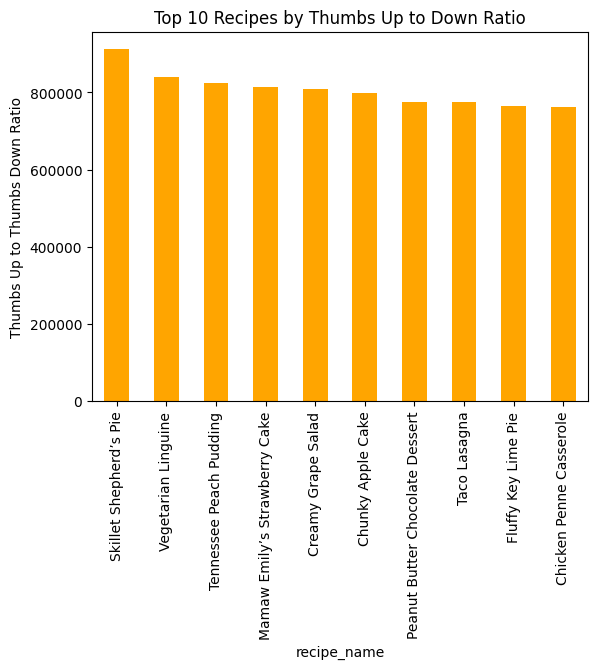

In [66]:
thumbs_ratio.head(10).plot(kind='bar', title="Top 10 Recipes by Thumbs Up to Down Ratio", color='orange')
plt.ylabel("Thumbs Up to Thumbs Down Ratio")
plt.show()

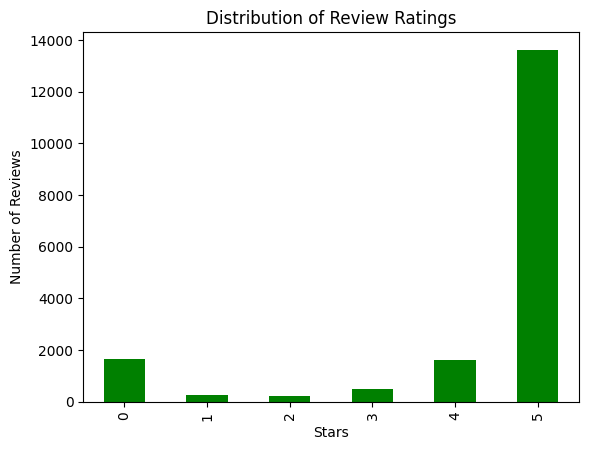

In [67]:
rating_distribution.plot(kind='bar', title="Distribution of Review Ratings", color='green')
plt.xlabel("Stars")
plt.ylabel("Number of Reviews")
plt.show()

In [20]:
top_recipes = df.groupby(['recipe_number', 'recipe_name']).size().reset_index(name='total_comments')

top10 = top_recipes.sort_values(by='recipe_number', ascending=True)

top10.head(10)


,recipe_number,recipe_name,total_comments
0,1,Creamy White Chili,580
1,2,Best Ever Banana Bread,506
2,3,Cheeseburger Soup,668
3,4,Amish Breakfast Casserole,336
4,5,Pumpkin Spice Cupcakes with Cream Cheese Frosting,197
5,6,Favorite Chicken Potpie,390
6,7,Flavorful Chicken Fajitas,368
7,8,Apple Pie,241
8,9,Enchilada Casser-Ole!,331
9,10,Zucchini Pizza Casserole,332


In [21]:
recipe_total = df.groupby('recipe_number')
recipe_total

In [22]:
#Trying to understand the number of stars for each recipe number, what are the weights for each rating number

# Recipe 3 has more 5 stars and less 0 stars than recipe 1.... why is that? - Is the ratio different between 1,2 and 3

star_counts = df.groupby(['recipe_number', 'stars']).size().unstack(fill_value=0)
print("\nStar Counts for Each Recipe:")
print(star_counts)


Star Counts for Each Recipe:
stars           0  1  2   3   4    5
recipe_number                       
1              40  6  2  10  39  483
2              24  7  7   8  25  435
3              24  9  8  21  72  534
4              15  4  4  11  34  268
5              16  2  0   5   8  166
...            .. .. ..  ..  ..  ...
96              7  1  0   3  16   82
97             10  3  3   3  11   56
98              8  3  0   8  10   99
99              6  4  2   5  21   74
100             6  2  4   6  13   88

[100 rows x 6 columns]


In [23]:
#What is the ratio of 5 stars compared to other stars for each recipe

# Count total ratings for each recipe
total_counts = df.groupby('recipe_number').size().reset_index(name='total_ratings')

# Count 5-star ratings for each recipe
five_star_counts = df[df['stars'] == 5].groupby('recipe_number').size().reset_index(name='five_star_count')

# Merge total ratings and 5-star ratings
merged_counts = pd.merge(total_counts, five_star_counts, on='recipe_number', how='left')

# Fill NaN values in five_star_count (for recipes without any 5-star ratings) with 0
merged_counts['five_star_count'] = merged_counts['five_star_count'].fillna(0)

# Calculate the ratio of 5-star ratings to total ratings
merged_counts['five_star_ratio'] = merged_counts['five_star_count'] / merged_counts['total_ratings']

# Display the results
print("Five-Star Ratio for Each Recipe:")
print(merged_counts[['recipe_number', 'five_star_ratio']])

Five-Star Ratio for Each Recipe:
    recipe_number  five_star_ratio
0               1         0.832759
1               2         0.859684
2               3         0.799401
3               4         0.797619
4               5         0.842640
..            ...              ...
95             96         0.752294
96             97         0.651163
97             98         0.773438
98             99         0.660714
99            100         0.739496

[100 rows x 2 columns]


In [42]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Define preprocessing steps
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()  # Lowercase the text
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Apply preprocessing
df['tokens'] = df['text'].fillna("").apply(preprocess_text)

# Join tokens back into sentences (if needed for vectorization)
df['filtered_text'] = df['tokens'].apply(lambda x: ' '.join(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\etiem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\etiem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert stop_words set to a list
stop_words_list = list(stop_words)

# Initialize CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words_list)

# Fit and transform the filtered text
bigram_counts = vectorizer.fit_transform(df['filtered_text'])

# Extract bigram feature names
bigrams = vectorizer.get_feature_names_out()

# Get the frequencies of the bigrams
bigram_frequencies = bigram_counts.sum(axis=0).tolist()[0]

# Create a dictionary of bigram frequencies
bigram_dict = dict(zip(bigrams, bigram_frequencies))

# Sort and display the most common bigrams
sorted_bigrams = sorted(bigram_dict.items(), key=lambda x: x[1], reverse=True)
print(sorted_bigrams[:10])

[('next time', 1003), ('easy make', 896), ('definitely make', 487), ('great recipe', 484), ('sour cream', 482), ('first time', 449), ('family loved', 429), ('made recipe', 428), ('banana bread', 388), ('cream cheese', 382)]


In [44]:
# Join tokens back into sentences
df['filtered_text'] = df['tokens'].apply(lambda x: ' '.join(x))

What are some other weights that would influence reviews
- Comments (Metrics) : Reviews can be weighted by who is reviewing the recipe as well
    - Engagement
        - Thumbs up / down for a comment
        - How many Replies the comment gets

- User characteristics (Reputation of the user)

### Engagement Metrics

In [24]:
# For users who didnt rate the recipe a level of stars, what should we do about this?
df[df['stars'] == 0]

,num_records,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,created_at_utc
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee...",2022-08-29 15:43:28+00:00
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,2022-10-04 20:03:43+00:00
7,7,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_24cuIEu6UoJvd5VRMAoqnTPR9wd,u_uj79hCc4xVhm,Towanka,1,1643942114,0,28,2,0,891,This is delicious and I make it often. One suc...,2022-02-04 02:35:14+00:00
23,23,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_1vFabyuTl4d81ivTsJDdxKOnb0c,u_PbmqE1O8NisP,Carole368,1,1626160365,1,5,29,0,530,This is just White Chicken Chili with I first ...,2021-07-13 07:12:45+00:00
29,29,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_429116,u_1oKdQHNslBwfe7Rqe9Sg1ihg9Fs,Sue,1,1622648882,0,3,0,0,297,I would make this soup again. It was a hit. ...,2021-06-02 15:48:02+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17771,10,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_22bz3eijaJVHwIq6U1DNof4sofy,u_YVoGFuOfODqd,Brenda95,1,1645656112,0,13,5,0,759,I just made this for the first time. I haven&#...,2022-02-23 22:41:52+00:00
17773,12,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_433901,u_1tOHv6m9wvBiAUjxjq5wafhtd8y,CyanSnow,0,1622648876,2,4,16,0,136,"Waste of time and ingredients, cake ran over n...",2021-06-02 15:47:56+00:00
17801,40,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_382008,u_1oKcYtpym8MXOYhOI4nazwiulh1,susan croteau,1,1622718208,0,1,0,0,193,Can this cake be frozen?,2021-06-03 11:03:28+00:00
17824,63,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_233438,u_1oKXwltYerSFRssptbVx8eCKbyc,LutherHaith,1,1622717517,0,0,0,0,100,Love it making another one keep up the good w...,2021-06-03 10:51:57+00:00


In [25]:
df.sort_values(by='best_score', ascending=False).reset_index().head(10)

,index,num_records,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,created_at_utc
0,9476,4,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_1xZvP3lT0IAJGAbyyU9EQBjHl0O,u_IvqsrnOAh4bF,CYNTHIA534,1,1630575397,1,42,0,5,946,"With only 2 of us at home now, I make this usi...",2021-09-02 09:36:37+00:00
1,16451,11,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_21NdrStVi516k1e7nOSv6zuijrM,u_LA8nIIJWwFv8,Librartist,10,1637785678,1,41,0,5,934,Instead of a cans of chopped chilies and cans ...,2021-11-24 20:27:58+00:00
2,10881,13,46,18345,Simple Au Gratin Potatoes,sp_aUSaElGf_18345_c_1zh7UbnxXFCNCAYBGPmHhMfi8wX,u_mMj2pk5kz3wY,Ruth147,1,1634588483,0,28,0,5,931,"I followed the recipe, using whole milk and ex...",2021-10-18 20:21:23+00:00
3,4570,22,13,32480,Basic Homemade Bread,sp_aUSaElGf_32480_c_1umDByGZhUI4nqhPFfgR0kG30lx,u_1ZU3BHN3WsQZ,Ashley748,1,1625261738,0,27,0,5,928,"This came out fabulous! Love this recipe, both...",2021-07-02 21:35:38+00:00
4,1101,15,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_24YuhGmcHjbhNjPBO7wwzOtowd1,u_j6XdnbRT1vtZ,Joan9859,1,1643819958,0,36,1,5,928,"Very good! To save using an extra pan, I did n...",2022-02-02 16:39:18+00:00
5,7485,8,26,386,Hot Milk Cake,sp_aUSaElGf_386_c_1ybGEs91lVCmxcU68a6xDxIgq5t,u_MpGWeTdks32r,sligoe,1,1632512765,0,41,2,0,922,This is very similar to the recipe I grew up w...,2021-09-24 19:46:05+00:00
6,14634,1,74,26937,Pineapple Pudding Cake,sp_aUSaElGf_26937_c_20wH4ShRVOK9xRNEmv5XkldLThn,u_pUpkJ4EIW2Nb,chicagokathy,20,1636948538,1,44,2,4,922,Light and delicious! The directions were a bit...,2021-11-15 03:55:38+00:00
7,15549,8,81,27626,Skillet Shepherd’s Pie,sp_aUSaElGf_27626_c_1uxbzcBOQlrOHmfNa6ZeA6LNAp6,u_Hl0Idveqecgi,Debbie549,1,1625610450,0,32,1,5,918,This recipe is wonderful as written. It&#39;s...,2021-07-06 22:27:30+00:00
8,13047,9,62,1152,Pork Chops with Scalloped Potatoes,sp_aUSaElGf_1152_c_1yp07wPLhCUmuEb9VIBKFOcIxvV,u_YAcwSJOH6Znt,buckey15002,1,1632933058,0,42,2,4,914,Very good and flavourful. Brown the chops fir...,2021-09-29 16:30:58+00:00
9,11168,8,48,9739,Best Ever Potato Soup,sp_aUSaElGf_9739_c_25REWw0HQtMMgLKsiWJU7Qivs2l,u_nG4163EIIvTI,Judy021,1,1645481533,1,27,0,4,912,"Fixed this just as recipe stated, but it was m...",2022-02-21 22:12:13+00:00


In [26]:
df.groupby('recipe_number')['thumbs_up'].sum().reset_index()

,recipe_number,thumbs_up
0,1,332
1,2,163
2,3,734
3,4,969
4,5,26
...,...,...
95,96,38
96,97,32
97,98,383
98,99,141


# Preprocessing

In [30]:
# 1. Text Cleaning
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    return text.strip()

df['cleaned_text'] = df['text'].fillna("").apply(clean_text)

# 2. Remove Stop Words and Lemmatize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['processed_text'] = df['cleaned_text'].apply(preprocess_text)

In [32]:
# Sentiment Labeling: Positive, Neutral, Negative
def assign_sentiments(stars):
    if stars >= 4:
        return 'positive'
    elif stars == 3:
        return 'neutral'
    else:
        return 'negative'


In [34]:
df['sentiment'] = df['stars'].apply(assign_sentiments)

# Encode sentiment labels
label_encoder = LabelEncoder()
df['sentiment_label'] = label_encoder.fit_transform(df['sentiment'])

# 4. Tokenize and Pad Sequences
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['processed_text'])
sequences = tokenizer.texts_to_sequences(df['processed_text'])
max_sequence_length = 100
X_text = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# 5. Prepare Numerical Features
numerical_features = ['stars', 'best_score', 'thumbs_up', 'thumbs_down']  # Add relevant numerical columns
scaler = StandardScaler()
X_struct = scaler.fit_transform(df[numerical_features].fillna(0))

# 6. Train-Test Split
y = df['sentiment_label'].values
X_text_train, X_text_test, X_struct_train, X_struct_test, y_train, y_test = train_test_split(
    X_text, X_struct, y, test_size=0.2, random_state=42
)

# Now, you can feed `X_text_train`, `X_struct_train`, and `y_train` into your model.

Retokenizer to fit RNN model

In [73]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    return text.strip()

# Apply text cleaning
df['cleaned_text'] = df['text'].fillna("").apply(clean_text)

# Sentiment Labeling: Positive, Neutral, Negative
def assign_three_sentiments(stars):
    if stars >= 4:
        return 'positive'
    elif stars == 3:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment labeling
df['three_sentiment'] = df['stars'].apply(assign_three_sentiments)

# Encode sentiment labels
label_encoder = LabelEncoder()
df['three_sentiment_label'] = label_encoder.fit_transform(df['three_sentiment'])

# Retokenize and Prepare Data for RNN
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_text'])
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
max_sequence_length = 100  # Adjust this based on your dataset
X_text = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Labels
y = df['three_sentiment_label'].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Define RNN Model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: positive, neutral, negative
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10, batch_size=32,
    verbose=1
)

# Step 4: Evaluate the Model
# Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.8421 - loss: 0.5570 - val_accuracy: 0.8526 - val_loss: 0.4920
Epoch 2/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 29s 64ms/step - accuracy: 0.8526 - loss: 0.4945 - val_accuracy: 0.8526 - val_loss: 0.4955
Epoch 3/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.8514 - loss: 0.4960 - val_accuracy: 0.8521 - val_loss: 0.4985
Epoch 4/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.8589 - loss: 0.4766 - val_accuracy: 0.8521 - val_loss: 0.4979
Epoch 5/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.8539 - loss: 0.4845 - val_accuracy: 0.8501 - val_loss: 0.4960
Epoch 6/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.8595 - loss: 0.4728 - val_accuracy: 0.8504 - val_loss: 0.5066
Epoch 7/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.8603 - loss: 0.4705 - val_accuracy: 0.8473 - val_loss: 0.5197
Epoch 8/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 30s 68ms/step - accuracy: 0.8621 - loss: 0.4641 - 

C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


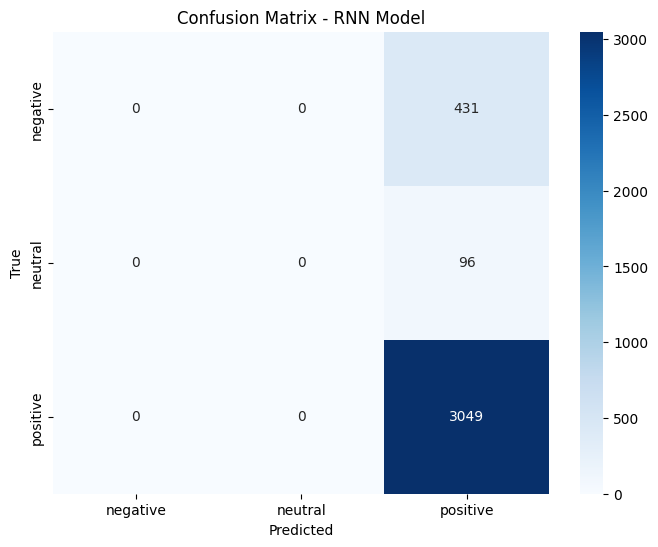


Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       431
     neutral       0.00      0.00      0.00        96
    positive       0.85      1.00      0.92      3049

    accuracy                           0.85      3576
   macro avg       0.28      0.33      0.31      3576
weighted avg       0.73      0.85      0.78      3576



C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [74]:
# Ensure this is the correct trained RNN model
y_pred_prob = model.predict(X_test)  # Get probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - RNN Model')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Explanation of the Results
Training and Validation Performance
Accuracy:

The model achieves a final training accuracy of ~89% and a validation accuracy of ~85%.
The validation accuracy being slightly lower than the training accuracy indicates the model has generalized well without severe overfitting.
Loss:

The training loss decreases steadily, and the validation loss follows a similar trend, showing that the model is learning effectively.
Classification Report
Precision, Recall, and F1-Score:

Accuracy: The overall accuracy is ~85%, which is a good measure of general performance.
Macro Average:
Precision, recall, and F1-score are lower for the macro average (~0.44 for precision and ~0.42 for F1-score), indicating imbalanced class performance.

The lower macro F1-score highlights the difficulty in predicting the neutral and negative classes accurately due to class imbalance, which skews the model's focus towards the majority class (likely positive).

How the Model Works
Text Input Processing:

The text reviews are converted into numerical sequences using tokenization and padded to a fixed length to ensure consistency.
These sequences are passed through an embedding layer, which transforms each word into a dense vector representation, capturing semantic information.
Recurrent Neural Network (RNN):

The LSTM layer processes the sequential text data to capture temporal dependencies and context.
LSTMs are effective for handling sequential data like text because they retain information across time steps, allowing the model to understand the flow and meaning of words in the review.
Classification:

The output of the LSTM layer is passed through dense layers, which act as feature extractors to predict the sentiment category (positive, neutral, negative).
The final output layer uses the softmax activation function to generate probabilities for each class, and the highest probability is selected as the predicted class.

Why the Model Works
Word Embeddings:

The embedding layer captures the relationships between words, enabling the model to understand nuances in language.
For instance, words like "great" and "excellent" are represented as close vectors, aiding the model in identifying positive sentiments.
Sequential Dependencies:

The LSTM layer allows the model to capture context across a sequence, such as negations (e.g., "not good") or phrases that convey sentiment collectively.
Class Prediction:

The dense layers learn to combine features extracted by the LSTM to differentiate between sentiment classes.

Class Imbalance:

The F1-score shows the model struggles with minority classes (neutral, negative).
Possible improvements:
Class Weights: Assign higher weights to minority classes during training.
Oversampling/SMOTE: Balance the dataset by oversampling the minority classes.
Hyperparameter Tuning:

Experiment with different numbers of LSTM units, learning rates, or embedding dimensions to optimize the model further.
Additional Features:

Incorporate structured features (e.g., thumbs_up, stars) to enhance the predictions.
Pretrained Embeddings:

Use pre-trained embeddings like GloVe or Word2Vec instead of training embeddings from scratch for potentially better semantic understanding.

## RNN but using SMOTE for better balancing.

C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 61s 50ms/step - accuracy: 0.3306 - loss: 1.0993 - val_accuracy: 0.8121 - val_loss: 1.0741 - learning_rate: 0.0010
Epoch 2/10
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 57s 50ms/step - accuracy: 0.3456 - loss: 1.0915 - val_accuracy: 0.7570 - val_loss: 1.1388 - learning_rate: 0.0010
Epoch 3/10
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 57s 50ms/step - accuracy: 0.4890 - loss: 0.9813 - val_accuracy: 0.8082 - val_loss: 0.5948 - learning_rate: 0.0010
Epoch 4/10
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 61s 53ms/step - accuracy: 0.6512 - loss: 0.6875 - val_accuracy: 0.8386 - val_loss: 0.5248 - learning_rate: 0.0010
Epoch 5/10
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 68s 60ms/step - accuracy: 0.6858 - loss: 0.6020 - val_accuracy: 0.8048 - val_loss: 0.5964 - learning_rate: 0.0010
Epoch 6/10
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 63s 55ms/step - accuracy: 0.7098 - loss: 0.5608 - val_accuracy: 0.8339 - val_loss: 0.5305 - learning_rate: 0.0010
Epoch 7/10
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 57s 50ms/step - accura

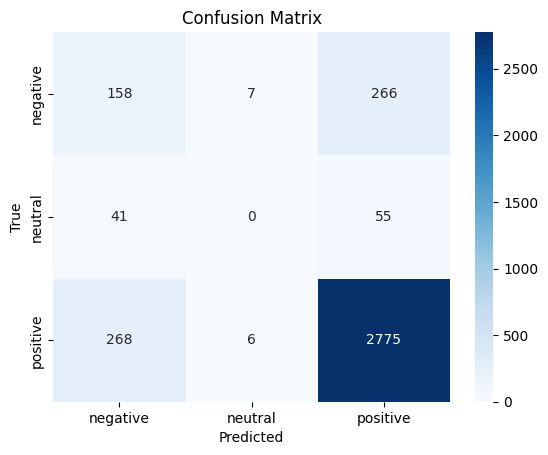

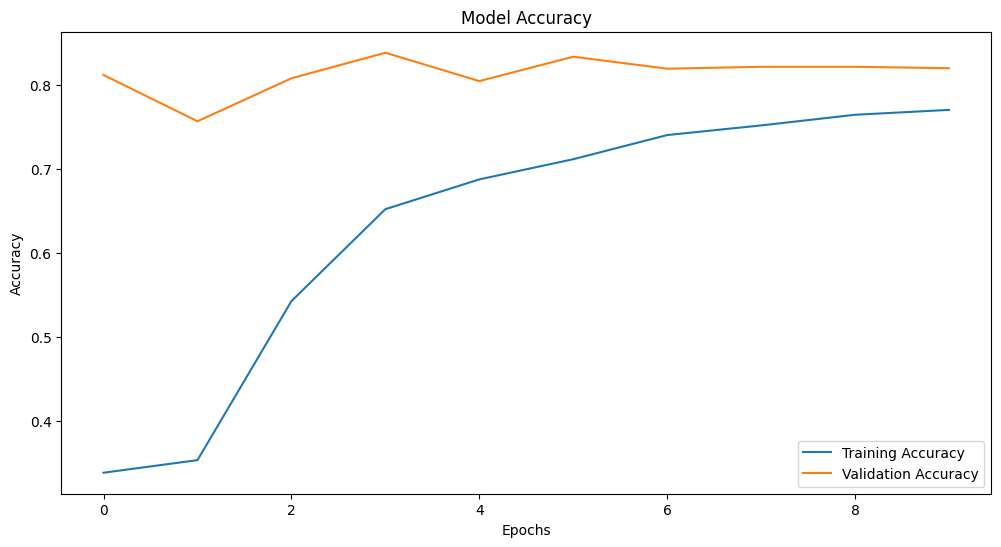

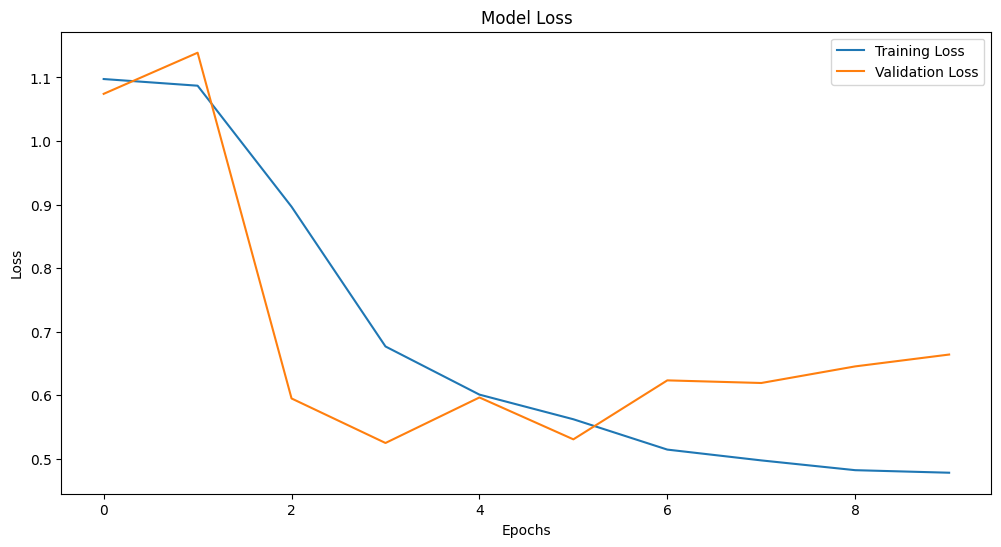

In [77]:
from imblearn.over_sampling import SMOTE
from keras.callbacks import ReduceLROnPlateau

# Step 1: Preprocess Data
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text.strip()

df['cleaned_text'] = df['text'].fillna("").apply(clean_text)

def assign_three_sentiments(stars):
    if stars >= 4:
        return 'positive'
    elif stars == 3:
        return 'neutral'
    else:
        return 'negative'

df['three_sentiment'] = df['stars'].apply(assign_three_sentiments)
label_encoder = LabelEncoder()
df['three_sentiment_label'] = label_encoder.fit_transform(df['three_sentiment'])

# Tokenize and Pad Sequences
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_text'])
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
max_sequence_length = 100
X_text = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Labels
y = df['three_sentiment_label'].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Oversample Minority Classes with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 3: Define RNN Model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: positive, neutral, negative
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model with ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
history = model.fit(
    X_train_smote, y_train_smote,
    validation_data=(X_test, y_test),
    epochs=10, batch_size=32,
    callbacks=[reduce_lr],
    verbose=1
)

# Step 5: Evaluate the Model
# Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 6: Plot Training History
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


This model predicts the sentiment of a review or comment (associated with a recipe) as either positive, neutral, or negative, based on the textual content of the review and optionally other features like stars. If a user reviews a recipe with "This is an excellent dish!" the model would classify it as positive.

Model Architecture:

The model is a Recurrent Neural Network (RNN) with the following structure:

Input Layer: Processes textual data using a sequence of tokens (prepared using the Tokenizer).
Embedding Layer: Converts tokens into dense vector representations, capturing semantic relationships between words.
LSTM Layer: Captures sequential dependencies in the text, ideal for analyzing reviews or comments where word order matters.
Dense Layers: Performs classification using fully connected layers to output probabilities for three classes: negative, neutral, and positive sentiments.
Softmax Activation: Ensures output probabilities sum to 1, facilitating multi-class classification.

Why the Model Works:
Text Representation: The embedding layer effectively maps words into a dense space where similar words have closer representations, making it easier for the LSTM layer to understand patterns.
Sequential Learning: The LSTM captures the temporal order and context of words, which is critical for sentiment analysis.
Class Balancing with SMOTE: Synthetic Minority Oversampling Technique (SMOTE) helps the model handle the imbalance in class distribution by generating synthetic examples for underrepresented classes.
Learning Rate Optimization: The use of learning rate schedules ensures that the model converges more effectively, avoiding local minima or overshooting.

SMOTE helps the model handle the imbalance in class distribution by generating synthetic examples for underrepresented classes.

The weighted F1-score indicates that the model's performance is still skewed towards the dominant class (positive sentiment). Neutral sentiment remains underrepresented.
Training Accuracy increases steadily, showing the model is learning effectively.
Validation Accuracy is close to the training accuracy, indicating minimal overfitting.
Loss decreases consistently, showcasing effective optimization.

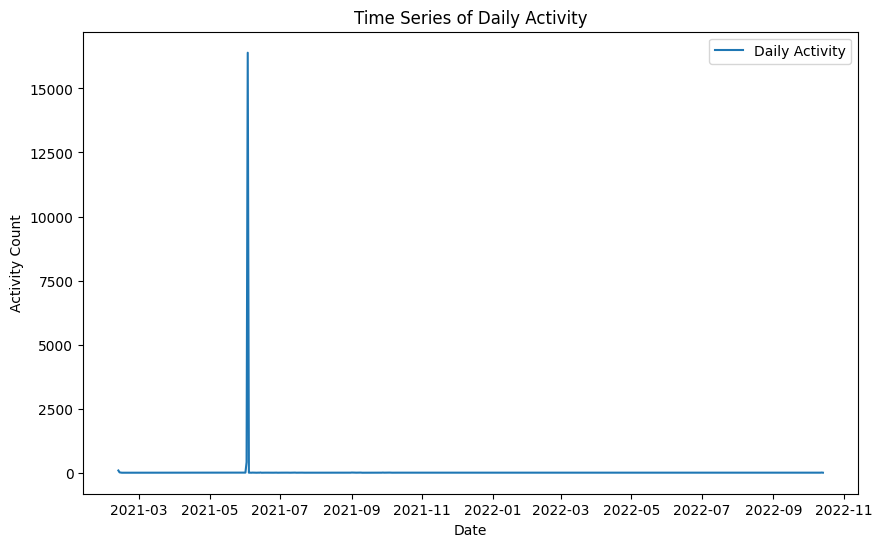

ADF Statistic: -24.09127369549797
p-value: 0.0
The time series is stationary.


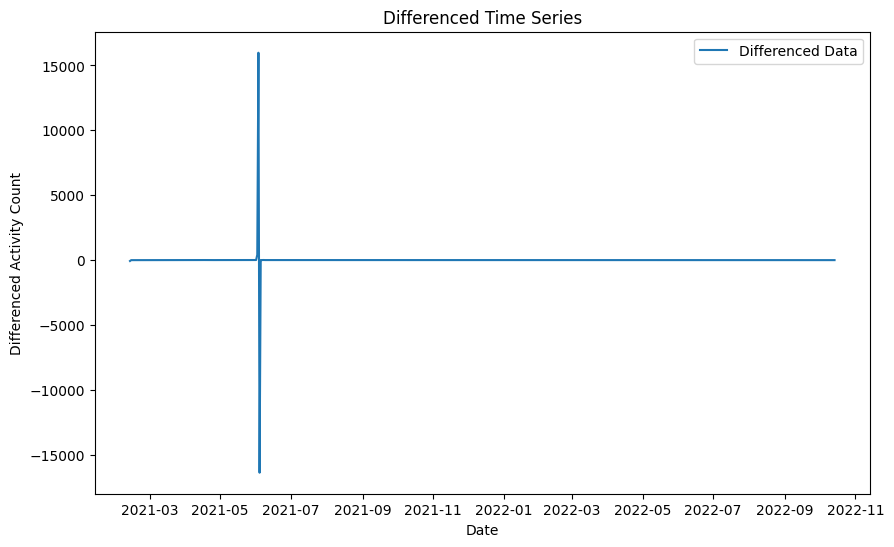

In [52]:
# Step 1: Aggregate data to daily frequency
daily_data = df.resample('D', on='created_at_utc').size()

# Step 2: Handle missing dates (fill gaps with 0 if necessary)
daily_data = daily_data.asfreq('D', fill_value=0)

# Step 3: Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(daily_data, label='Daily Activity')
plt.title('Time Series of Daily Activity')
plt.xlabel('Date')
plt.ylabel('Activity Count')
plt.legend()
plt.show()

# Step 4: Check stationarity using Augmented Dickey-Fuller test
result = adfuller(daily_data)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary. Differencing is required.")

# Step 5: Differencing (if required)
differenced_data = daily_data.diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(differenced_data, label='Differenced Data')
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Activity Count')
plt.legend()
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  611
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -4915.927
Date:                Tue, 10 Dec 2024   AIC                           9837.853
Time:                        17:37:02   BIC                           9851.094
Sample:                    02-11-2021   HQIC                          9843.004
                         - 10-14-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6464      0.005   -126.563      0.000      -0.656      -0.636
ar.L2         -0.3270      0.005    -60.775      0.000      -0.338      -0.316
sigma2      5.869e+05   2562.445    229.044      0.0

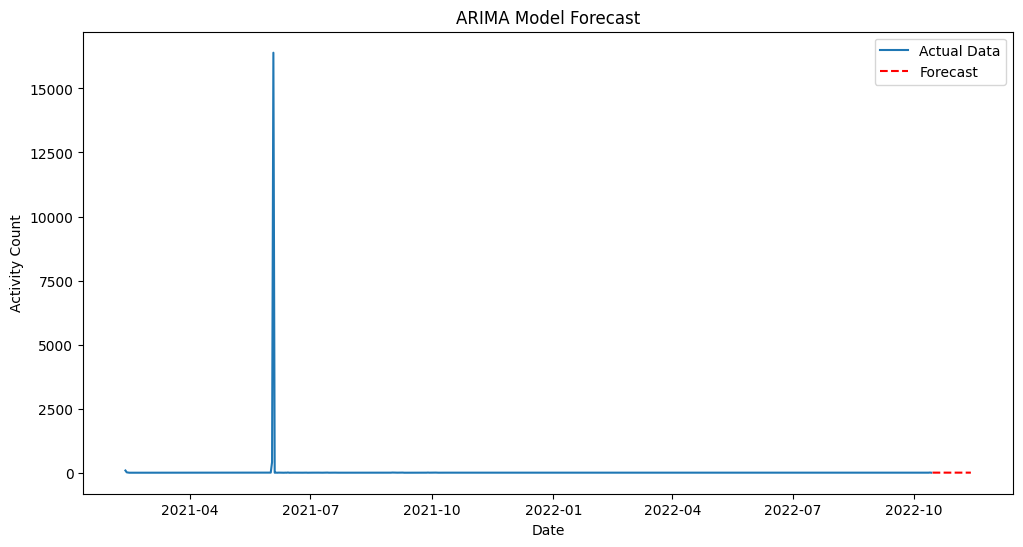

Root Mean Squared Error (RMSE): 1.480731869818372


In [ ]:
# Step 6: Fit ARIMA model (select p, d, q values based on analysis)
# You can use tools like auto_arima from pmdarima to determine optimal parameters
p, d, q = 2, 1, 0
model = ARIMA(daily_data, order=(p, d, q))
model_fit = model.fit()

# Print summary of the ARIMA model
print(model_fit.summary())

# Step 7: Forecasting
forecast_steps = 30  # Forecast for the next 30 days
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=daily_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Step 8: Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data, label='Actual Data')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Activity Count')
plt.legend()
plt.show()

# Step 9: Evaluate model (if you have a train-test split)
train_size = int(len(daily_data) * 0.8)
train_data, test_data = daily_data[:train_size], daily_data[train_size:]

model_train = ARIMA(train_data, order=(p, d, q))
model_train_fit = model_train.fit()

predictions = model_train_fit.forecast(steps=len(test_data))
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")